**MODELO SVM**

# Preprocesamiento de Datos

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [3]:
# 1. Carga de datos
data = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/FSM?period1=1597123200&period2=1628659200&interval=1d&events=history&includeAdjustedClose=true')

In [4]:
# 2. Limpieza de datos
# Eliminación de duplicados
data = data.drop_duplicates()

In [7]:
# Separación de columnas numéricas y no numéricas
numeric_cols = data.select_dtypes(include=[np.number]).columns
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns

In [8]:
# Imputación de valores nulos para columnas numéricas
imputer = SimpleImputer(strategy='mean')  # También puedes usar 'median', 'most_frequent', etc.
data_imputed_numeric = pd.DataFrame(imputer.fit_transform(data[numeric_cols]), columns=numeric_cols)

In [9]:
# Combinación de las columnas imputadas con las no numéricas originales
data_imputed = pd.concat([data_imputed_numeric, data[non_numeric_cols].reset_index(drop=True)], axis=1)

In [10]:
# 3. Normalización de las variables numéricas
scaler = StandardScaler()
data_scaled_numeric = pd.DataFrame(scaler.fit_transform(data_imputed_numeric), columns=numeric_cols)

In [11]:
# Combinación de las columnas escaladas con las no numéricas originales
data_scaled = pd.concat([data_scaled_numeric, data[non_numeric_cols].reset_index(drop=True)], axis=1)

In [14]:
# 4. Selección de variables usando el coeficiente de correlación de Pearson
target_column_name = 'Close'  # Columna objetivo

if target_column_name not in numeric_cols:
    raise ValueError(f"La columna objetivo '{target_column_name}' no se encuentra en las columnas numéricas.")

# Cálculo de la matriz de correlación solo para las columnas numéricas
corr_matrix = data_scaled_numeric.corr()

# Selección de las variables con alta correlación con la columna objetivo
target_corr = corr_matrix[target_column_name].abs().sort_values(ascending=False)
relevant_features = target_corr[target_corr > 0.1].index.tolist()
data_relevant = data_scaled[relevant_features]

print("Preprocesamiento de datos completado.")

Preprocesamiento de datos completado.


#**Entrenamiento y Validación**


In [17]:
# Entrenamiento y Validación
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# 5. División de los datos
X = data_relevant.drop(columns=[target_column_name])
y = data_relevant[target_column_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# 6. Entrenamiento del modelo SVM
svm_model = SVR()
svm_model.fit(X_train, y_train)

SVR()

In [20]:
# 7. Validación del modelo
y_pred = svm_model.predict(X_test)

mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAPE: {mape}")
print(f"RMSE: {rmse}")

MAPE: 0.2957597988985048
RMSE: 0.07870333871601704


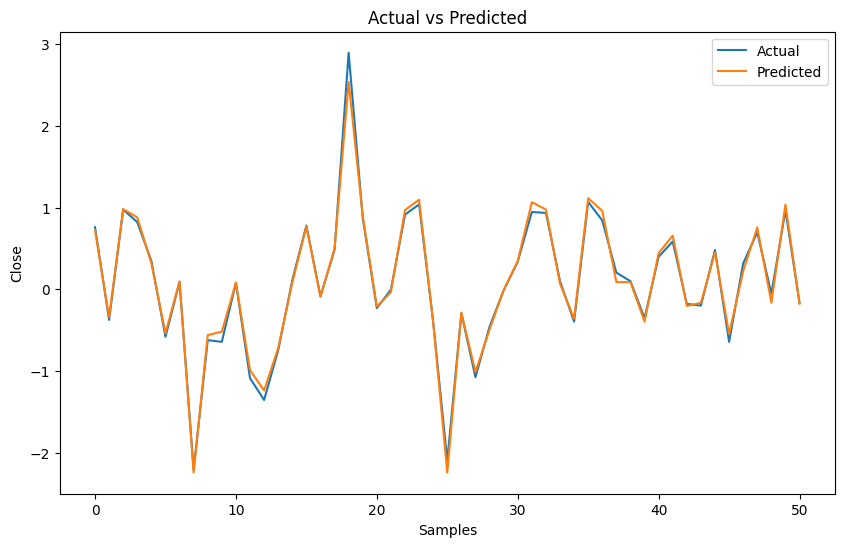

In [21]:
# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Close')
plt.show()

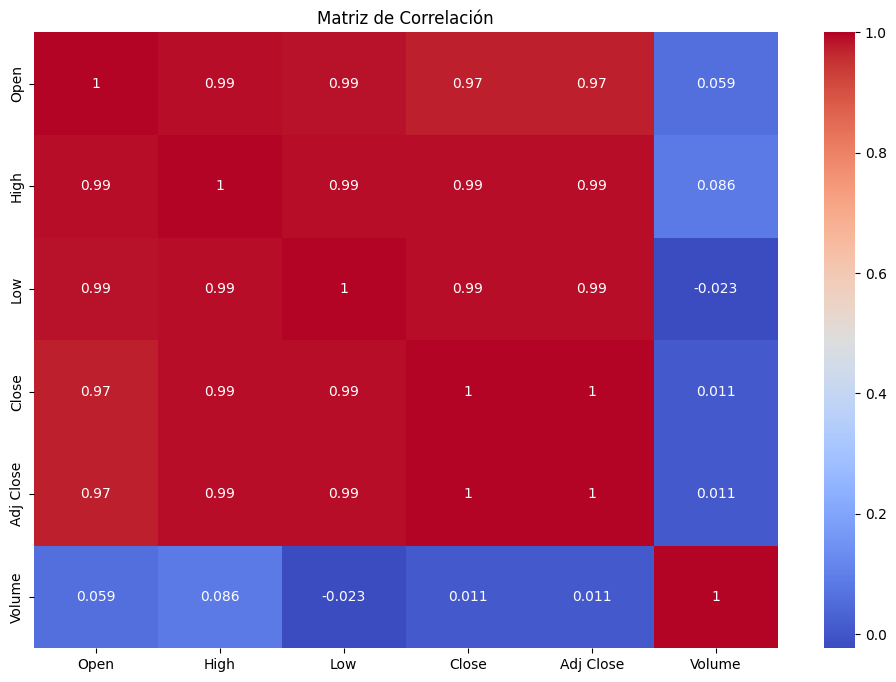

In [22]:
# Matriz de correlación visual
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()